In [1]:
#logistic regression

In [3]:
import pandas as pd
wine=pd.read_csv('https://bit.ly/wine_csv_data')

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine.info()#누락된게 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split#20%만 테스트 세트로 나눔 디폴트:25
train_input, test_input, train_target, test_target=train_test_split(data,target,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [12]:
#약간 언더피팅이다 -> 결정트리 사용해봄

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [14]:
#테스트에서는 좀 낮은 점수 오버피팅

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()#만들어진 트리 시각화

KeyboardInterrupt: 

In [17]:
#gini 지니 불순도를 사용하여 분류 기준을 정함
#부모와 자식노드 사이의 불순도 차이를 정보이득이라고 함
#엔트로피(entropy) 불순도 log사용


In [18]:
#트리가 제한없이 계속 늘어났기 때문에 오버피팅이 발생했음


In [20]:
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


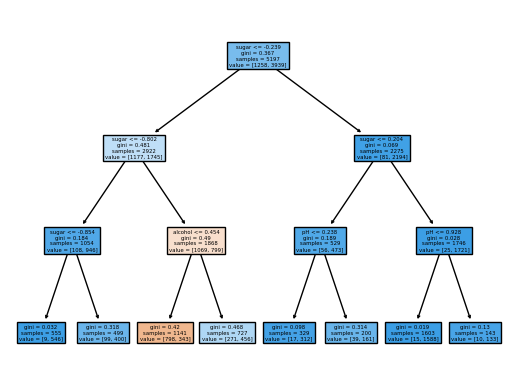

In [21]:
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [23]:
#트리는 표준화 전처리를 하지 않아도 된다는 장점이 있음
dt=DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


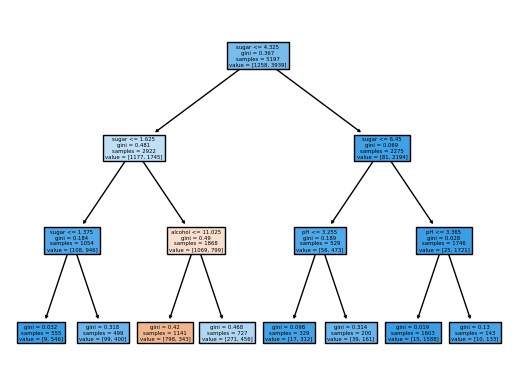

In [24]:
plot_tree(dt, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

In [25]:
dt.feature_importances_#특성중요도 도수, 당도, pH순

array([0.12345626, 0.86862934, 0.0079144 ])